In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-air-quality-dataset/global_air_quality_data_10000.csv


<div style="background-color:#E6F9E6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #66C2A5; margin-top: 20px;">
    <h1 style="font-size:28px; font-family:Georgia, serif; color:#66C2A5; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        Exploring Global Air Quality Data
    </h1>
    <p style="font-size:22px; font-family:Georgia, serif; line-height: 1.5em; text-indent: 20px; color:#333;">
        Hello Kagglers! My name is <span style="color:#66C2A5;"><b>Faiz Siddiqui</b></span>, and I am excited to present an analysis of global air quality data. In this notebook, we will delve into the rich dataset containing air quality measurements from various cities worldwide. Our objective is to gain insights into air pollution trends and assess the impact of different pollutants on air quality across different regions.
    </p>
    <p style="font-size:22px; font-family:Georgia, serif; line-height: 1.5em; text-indent: 20px; color:#333;">
        We will perform exploratory data analysis (EDA) to uncover patterns and trends, visualize key metrics, and identify potential correlations between different pollutants and meteorological variables. By the end of this notebook, you'll gain a comprehensive understanding of global air quality and its variations across different cities and countries.
    </p>
    <p style="font-size:22px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#66C2A5;">
        <b>Thank you for joining me on this analytical journey. I look forward to your feedback and suggestions!</b>
    </p>
</div>


<div style="background-color:#E6F9E6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #99C2A2; margin-top: 20px;">
    <h1 style="font-size:28px; font-family:Georgia, serif; color:#99C2A2; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        About the Dataset
    </h1>
    <p style="font-size:22px; font-family:Georgia, serif; line-height: 1.5em; text-indent: 20px; color:#333;">
        The Global Air Quality Data dataset provides an extensive compilation of air quality measurements from various prominent cities worldwide. This dataset includes crucial environmental indicators such as particulate matter (PM2.5 and PM10), nitrogen dioxide (NO2), sulfur dioxide (SO2), carbon monoxide (CO), and ozone (O3), along with meteorological data like temperature, humidity, and wind speed. With 10,000 records, this dataset is ideal for researchers, data scientists, and policy makers looking to analyze air quality trends, understand the impact of pollution on health, and develop strategies for environmental improvement.
    </p>
    <p style="font-size:22px; font-family:Georgia, serif; line-height: 1.5em; text-indent: 20px; color:#333;">
        The dataset is composed of the following columns:
    </p>
    <ul style="font-size:22px; font-family:Georgia, serif; line-height: 1.5em; color:#333; padding-left: 40px;">
        <li><b>City:</b> The name of the city where the air quality measurement was taken.</li>
        <li><b>Country:</b> The country in which the city is located.</li>
        <li><b>Date:</b> The date when the measurement was recorded.</li>
        <li><b>PM2.5:</b> The concentration of fine particulate matter with a diameter of less than 2.5 micrometers (µg/m³).</li>
        <li><b>PM10:</b> The concentration of particulate matter with a diameter of less than 10 micrometers (µg/m³).</li>
        <li><b>NO2:</b> The concentration of nitrogen dioxide (µg/m³).</li>
        <li><b>SO2:</b> The concentration of sulfur dioxide (µg/m³).</li>
        <li><b>CO:</b> The concentration of carbon monoxide (mg/m³).</li>
        <li><b>O3:</b> The concentration of ozone (µg/m³).</li>
        <li><b>Temperature:</b> The temperature at the time of measurement (°C).</li>
        <li><b>Humidity:</b> The humidity level at the time of measurement (%).</li>
        <li><b>Wind Speed:</b> The wind speed at the time of measurement (m/s).</li>
    </ul>
</div>


<div style="background-color:#E6F9E6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #66C2A5; margin-top: 20px;">
    <h1 style="font-size:28px; font-family:Georgia, serif; color:#66C2A5; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        Aim and Objectives
    </h1>
    <p style="font-size:22px; font-family:Georgia, serif; line-height: 1.5em; text-indent: 20px; color:#333;">
        In this notebook, we aim to perform a comprehensive analysis of the Global Air Quality Data. Our objectives are as follows:
    </p>
    <ul style="font-size:22px; font-family:Georgia, serif; line-height: 1.5em; color:#333; padding-left: 40px;">
        <li><b>Univariate Analysis:</b> Explore and visualize individual features in the dataset to understand their distributions and statistics.</li>
        <li><b>Bivariate Analysis:</b> Analyze the relationships between two features to uncover potential correlations or patterns.</li>
        <li><b>Multivariate Analysis:</b> Examine interactions among multiple features to identify complex patterns and insights.</li>
        <li><b>Time Series Analysis:</b> Investigate how air quality measurements change over time and identify any trends or seasonal effects.</li>
        <li><b>Geographical Analysis:</b> Explore variations in air quality across different cities and countries to understand regional differences.</li>
        <li><b>Conclusion:</b> Summarize the findings from the analysis, highlight key insights, and suggest potential actions or further research.</li>
    </ul>
</div>

 


<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:22px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Importing Necessary Libraries
    </h2>
</div>


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
plt.style.use('ggplot')

<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:22px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Importing Data Frame
    </h2>
</div>


In [3]:
df=pd.read_csv('/kaggle/input/global-air-quality-dataset/global_air_quality_data_10000.csv')
df

City       Country        Date   PM2.5    PM10    NO2    SO2  \
0            Bangkok      Thailand  2023-03-19   86.57   25.19  99.88  30.63   
1           Istanbul        Turkey  2023-02-16   50.63   97.39  48.14   8.71   
2     Rio de Janeiro        Brazil  2023-11-13  130.21   57.22  98.51   9.92   
3             Mumbai         India  2023-03-16  119.70  130.52  10.96  33.03   
4              Paris        France  2023-04-04   55.20   36.62  76.85  21.85   
...              ...           ...         ...     ...     ...    ...    ...   
9995    Johannesburg  South Africa  2023-09-16  147.85  184.34  90.33  34.93   
9996          Berlin       Germany  2023-12-05   12.22  121.49  49.04   5.66   
9997          Moscow        Russia  2023-11-26   44.07  143.62   8.41  32.58   
9998          Berlin       Germany  2023-02-03   67.43   96.79  43.23  29.19   
9999         Bangkok      Thailand  2023-06-13   16.34   28.80  50.48  21.20   

        CO      O3  Temperature  Humidity  Wind Speed  
0     4.46   36.29        17.67     59.35       13.76  
1     3.40  144.16         3.46     67.51        6.36  
2     0.12  179.31        25.29     29.30       12.87  
3     7.74   38.65        23.15     99.97        7.71  
4     2.00   67.09        16.02     90.28       14.16  
...    ...     ...          ...       ...         ...  
9995  2.81  191.45        -1.92     65.22       15.48  
9996  2.10  184.56        -9.81     12.16       10.75  
9997  0.69  167.68        39.35     53.95        4.56  
9998  6.01  148.50        26.21     58.54        2.71  
9999  0.49   17.41         2.50     66.05        5.01  

[10000 rows x 12 columns]

<div style="background-color:#D3F9D8; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #A9DFBF; margin-top: 18px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#2E8B57; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Understanding the Data and Descriptive Statistics
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-indent: 20px; color:#333333;">
        In this section, we'll explore the dataset in detail using various descriptive statistics methods. We'll use <code>df.describe()</code> to obtain a summary of the numerical features, <code>df.info()</code> to get an overview of the DataFrame's structure, and identify any potential issues like missing values. Our goal is to ensure the dataset is clean and ready for analysis. Additionally, we'll sort the data to cover the period from January 1, 2023, to December 30, 2023, to focus on the relevant timeframe for our analysis.
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-indent: 20px; color:#333333;">
        We will also enhance the dataset by creating new columns for the month and day of the week extracted from the date column. The date column will be converted to the <code>datetime</code> format to facilitate time-based analysis and ensure accurate processing.
    </p>
</div>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month_name']=df.Date.dt.month_name()
df['Day_name']=df.Date.dt.day_name() 

In [6]:
df.sort_values(by='Date',ascending=True).head()

City   Country       Date   PM2.5    PM10    NO2    SO2    CO  \
5948         Bangkok  Thailand 2023-01-01  146.15   17.85   8.16  26.30  6.47   
7722  Rio de Janeiro    Brazil 2023-01-01   52.43   76.80  46.99  13.02  8.41   
7276           Cairo     Egypt 2023-01-01  115.16   73.60  53.68  23.44  6.33   
9756        Istanbul    Turkey 2023-01-01   86.32  177.30  80.24  30.32  8.76   
9788  Rio de Janeiro    Brazil 2023-01-01   10.24  118.73  51.87  39.72  4.61   

          O3  Temperature  Humidity  Wind Speed Month_name Day_name  
5948   32.08        -2.45     40.91       18.89    January   Sunday  
7722  184.43        20.31     63.21        0.71    January   Sunday  
7276  156.81         4.12     37.98       11.75    January   Sunday  
9756   86.34        23.66     96.27        0.87    January   Sunday  
9788  136.18         9.69     27.61        3.52    January   Sunday

In [7]:
df.sort_values(by='Date',ascending=True).tail()

City      Country       Date   PM2.5    PM10    NO2    SO2    CO  \
4119  Beijing        China 2023-12-28   65.78   32.82  60.07  34.81  5.66   
3581   Berlin      Germany 2023-12-28  118.27  195.53  84.32   5.25  1.82   
6274    Seoul  South Korea 2023-12-28   26.77   52.08  48.29  13.14  7.67   
3207    Paris       France 2023-12-28  122.20   95.50  58.98  24.59  9.41   
4082    Paris       France 2023-12-28   90.30   40.79  34.19  17.49  5.88   

          O3  Temperature  Humidity  Wind Speed Month_name  Day_name  
4119   30.42         9.05     77.67       12.60   December  Thursday  
3581   66.84        11.80     52.10        1.05   December  Thursday  
6274   94.26        28.40     26.50        1.99   December  Thursday  
3207  194.09        -1.67     98.48       19.32   December  Thursday  
4082  168.45        -5.25     22.34       10.63   December  Thursday

In [8]:
df=df.sort_values(by='Date',ascending=True).reset_index().drop('index',axis=1)

In [9]:
df.drop('Date',axis=1).describe()

PM2.5          PM10           NO2           SO2            CO  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      77.448439    104.438161     52.198649     25.344490      5.047984   
std       41.927871     55.062396     27.320490     14.091194      2.852625   
min        5.020000     10.000000      5.010000      1.000000      0.100000   
25%       41.185000     57.137500     28.347500     13.190000      2.560000   
50%       77.725000    103.690000     52.100000     25.350000      5.090000   
75%      113.392500    152.265000     75.705000     37.500000      7.480000   
max      149.980000    200.000000    100.000000     49.990000     10.000000   

                 O3  Temperature      Humidity    Wind Speed  
count  10000.000000  10000.00000  10000.000000  10000.000000  
mean     106.031643     14.89715     55.078579     10.231636  
std       55.081345     14.44380     25.982232      5.632628  
min       10.040000    -10.00000     10.010000      0.500000  
25%       58.380000      2.25750     32.527500      5.290000  
50%      106.055000     14.75500     55.080000     10.260000  
75%      153.982500     27.38250     77.442500     15.070000  
max      200.000000     40.00000     99.990000     20.000000

<div style="background-color:#E8F4F8; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #B2C7D9; margin-top: 18px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#1F75FE; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Univariate Analysis of Air Quality Metrics
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-indent: 20px; color:#333333;">
        In this section, we will delve into the univariate analysis of the key air quality metrics in our dataset. The goal is to gain a deeper understanding of the distribution and characteristics of each variable individually. We will use various types of visualizations to achieve this:
    </p>
    <ul style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; color:#333333;">
        <li><b>Histogram:</b> To examine the frequency distribution of each air quality metric, providing insights into the overall spread and common values.</li>
        <li><b>Violin Plot:</b> To visualize the distribution of each variable, highlighting the density and potential multi-modality of the data.</li>
        <li><b>Box Plot:</b> To identify the central tendency, spread, and outliers in the data, giving a clear picture of the variability and extremes.</li>
        <li><b>Bar Plot:</b> To summarize the mean values of the air quality metrics, enabling a straightforward comparison between different variables.</li>
        <li><b>Pie Plot:</b> To illustrate the proportion of air quality measurements from different cities, offering a visual representation of geographic distribution.</li>
    </ul>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-indent: 20px; color:#333333;">
        These visualizations will help us to better understand the data and inform further analysis steps. Each plot type provides unique insights into the dataset, enabling us to explore patterns and anomalies effectively.
    </p>
</div>


<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:22px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Distribution of Pollutants and Meteorological Data
    </h2>
</div>

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border:2px solid #DCE775; margin-top: 18px;">
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>Note:</b> This Plotly graph includes Distribution of Pollutants and Meteorological Data combined into a single plot. To view individual data, you can double-click on any Variable on the right side of the plot.
    </p>
</div>

In [10]:
columns_to_analyze = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']

fig = go.Figure()

# Add histograms
for column in columns_to_analyze:
    fig.add_trace(go.Histogram(
        x=df[column],
        name=column,
        opacity=0.75,
        histnorm='density',
        marker=dict(line=dict(width=0.5)),
    ))

# Update layout
fig.update_layout(
    title='Distribution of Pollutants and Meteorological Data',
    xaxis_title='Value',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
    template='plotly_white'
)

<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:22px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Box Plots of Pollutants and Meteorological Data
    </h2>
</div>

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border:2px solid #DCE775; margin-top: 18px;">
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>Note:</b> This Plotly graph includes Distribution of Pollutants and Meteorological Data combined into a single plot. To view individual data, you can double-click on any Variable on the right side of the plot.
    </p>
</div>

In [11]:
colors = [
    'rgb(31, 119, 180)',
    'rgb(255, 127, 14)',
    'rgb(44, 160, 44)',
    'rgb(214, 39, 40)',
    'rgb(148, 103, 189)',
    'rgb(140, 86, 75)',
    'rgb(227, 119, 194)',
    'rgb(127, 127, 127)',
    'rgb(188, 189, 34)']
fig = go.Figure()

# Add box plots with customized colors
for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Box(
        y=df[column],
        name=column,
        boxmean=True,
        marker=dict(color=colors[i], line=dict(width=1)),
        fillcolor=colors[i],
        line_color='rgb(8,48,107)'
    ))

# Update layout with a more beautiful design
fig.update_layout(
    title='Box Plots of Pollutants and Meteorological Data',
    yaxis_title='Value',
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:22px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Violin Plots of Pollutants and Meteorological Data
    </h2>
</div>

In [12]:
import plotly.graph_objects as go

fig = go.Figure()

 
for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Violin(
        y=df[column],
        name=column,
        box_visible=True,
        meanline_visible=True,
        fillcolor=colors[i],
        line_color='rgb(8,48,107)'
    ))

 
fig.update_layout(
    title='Violin Plots of Pollutants and Meteorological Data',
    yaxis_title='Value',
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()


<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:22px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Mean and Standard Deviation of Pollutants and Meteorological Data
    </h2>
</div>

In [13]:
import plotly.express as px
# Example data for bar plot (replace with actual summary statistics)
bar_data = df.drop('Date',axis=1).describe().transpose().reset_index()
bar_data = bar_data[['index', 'mean', 'std']].rename(columns={'index': 'Feature'})
fig = px.bar(
    bar_data,
    x='Feature',
    y='mean',
    error_y='std',
    color='Feature',
    color_discrete_sequence=colors,
    title='Mean and Standard Deviation of Pollutants and Meteorological Data'
)
fig.update_layout(
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=40, r=40, t=40, b=40)
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:16px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Distribution of Individual plot of Pollutants and Meteorological Data Using Histogram and Box-plot
    </h2>
</div>

In [14]:
import plotly.subplots as sp
# Create subplots
fig = sp.make_subplots(rows=3, cols=3, subplot_titles=columns_to_analyze, vertical_spacing=0.1, horizontal_spacing=0.1)
# Add histograms to subplots
for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Histogram(
        x=df[column],
        name=column,
        opacity=0.75,
        histnorm='density',
        marker=dict(line=dict(width=0.5)),
    ), row=(i//3)+1, col=(i%3)+1)
# Update layout for histograms
fig.update_layout(
    title_text='Distribution of Pollutants and Meteorological Data',
    showlegend=False,
    template='plotly_white',
    height=900,
    width=1200
)
fig.show()
# Create subplots
fig = sp.make_subplots(rows=3, cols=3, subplot_titles=columns_to_analyze, vertical_spacing=0.1, horizontal_spacing=0.1)
# Add box plots to subplots
for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Box(
        y=df[column],
        name=column,
        boxmean=True,
        marker=dict(line=dict(width=1))
    ), row=(i//3)+1, col=(i%3)+1)
# Update layout for box plots
fig.update_layout(
    title_text='Box Plots of Pollutants and Meteorological Data',
    showlegend=False,
    template='plotly_white',
    height=900,
    width=1200
)
fig.show()

<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:22px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
       Distribution of Cities
    </h2>
</div>

In [15]:
import plotly.express as px
# Aggregate data for pie chart
pie_data = df['City'].value_counts().reset_index()
pie_data.columns = ['City', 'Count']
# Create subplots
fig = sp.make_subplots(rows=1, cols=1, specs=[[{'type':'pie'}]])
# Add pie charts to subplots
fig.add_trace(go.Pie(
    labels=pie_data['City'],
    values=pie_data['Count'],
    name='City Distribution',
    textinfo='label+percent',
    hole=0.3
))
# Update layout for pie charts
fig.update_layout(
    title_text='Distribution of Cities',
    template='plotly_white',
    height=600,
    width=600
)
fig.show()

<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:22px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
      Individual Violin Plots of Pollutants and Meteorological Data
    </h2>
</div>

In [16]:
import plotly.graph_objects as go
import plotly.subplots as sp
# Create subplots
fig = sp.make_subplots(rows=3, cols=3, subplot_titles=columns_to_analyze, vertical_spacing=0.1, horizontal_spacing=0.1)
# Add violin plots to subplots
for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Violin(
        y=df[column],
        name=column,
        box_visible=True,
        line_color='#000000',
        fillcolor=colors[i]
    ), row=(i//3)+1, col=(i%3)+1)
# Update layout for violin plots
fig.update_layout(
    title_text='Violin Plots of Pollutants and Meteorological Data',
    showlegend=False,
    template='plotly_white',
    height=900,
    width=1200
)
fig.show()

<div style="background-color:#E8F4F8; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #B2DFDB; margin-top: 18px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#00796B; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Bivariate Analysis and Correlation Heatmap
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        In this section, we will perform bivariate analysis by visualizing the correlations between various columns in our dataset. We will use heatmaps to illustrate the strength and direction of relationships between pairs of variables. This analysis helps us understand how different features interact with each other, which can provide valuable insights into the underlying data patterns and inform our modeling approach.
    </p>
</div>


In [17]:
import plotly.express as px

# Calculate correlation matrix
correlation_matrix = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']].corr()

# Create a heatmap
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='Viridis',  # Different color scale
    title='Correlation Matrix Heatmap',
    labels={'color': 'Correlation Coefficient'}
)

# Update layout for heatmap with increased size
fig.update_layout(
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=80, r=80, t=80, b=80),
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=45),
    height=800,  # Increase height
    width=1000   # Increase width
)

fig.show()


<div style="background-color:#6B8E23; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #006400; margin-top: 18px;">
    <h2 style="font-size:22px; font-family:Georgia, serif; color:#ffffff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
      Multivariate,Time Series and Geographical Analysis
    </h2>
</div>

<div style="background-color:#E0F7FA; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #4DB6AC; margin-top: 18px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#00796B; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Aggregating Data by Month, Country, and City
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        To gain deeper insights into air quality trends, we aggregate the data by <b>Month</b>, <b>Country</b>, and <b>City</b>. This aggregation calculates the average values for various pollutants and meteorological indicators such as PM2.5, PM10, NO2, SO2, CO, O3, Temperature, Humidity, and Wind Speed. With this summary data, we are well-prepared to conduct detailed time series analysis and geographical analysis.
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        Our dataset encompasses measurements from <b>20 different cities and countries</b>, providing a comprehensive view of air quality across diverse locations. This aggregated data will allow us to explore trends over time and compare air quality across various geographical regions.
    </p>
</div>


In [18]:
import pandas as pd

 
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Aggregate data by Month, Country, and City
monthly_country_city_summary = df.groupby(['Year', 'Month', 'Country', 'City']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'NO2': 'mean',
    'SO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'Temperature': 'mean',
    'Humidity': 'mean',
    'Wind Speed': 'mean'
}).reset_index()

# Display the first few rows
monthly_country_city_summary.head()


Year  Month    Country            City      PM2.5        PM10        NO2  \
0  2023      1  Australia          Sydney  81.729750   92.105250  53.462500   
1  2023      1     Brazil  Rio de Janeiro  90.486571  109.240000  48.430000   
2  2023      1     Canada         Toronto  83.263684  109.790789  54.015000   
3  2023      1      China         Beijing  67.254615  106.281538  51.324103   
4  2023      1      Egypt           Cairo  80.236047   92.203721  44.250465   

         SO2        CO          O3  Temperature   Humidity  Wind Speed  
0  19.818750  4.510000  104.905750    14.526000  59.237750    9.977000  
1  22.981714  4.627429  107.256286    15.775143  55.611143   10.564000  
2  23.793421  6.091053  113.107895    13.873421  56.350263   11.976316  
3  25.139744  5.108462   72.091795    15.222308  54.562308   10.595385  
4  24.420930  4.692791   93.963721    14.810465  52.090698    9.300233

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Calculating Month-over-Month Changes in Air Quality
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        In this section, we sort the aggregated data by <b>Year</b>, <b>Month</b>, <b>Country</b>, and <b>City</b> to ensure a chronological order. We then calculate the month-over-month changes for key environmental indicators such as PM2.5, PM10, NO2, SO2, CO, O3, Temperature, Humidity, and Wind Speed. This analysis helps us understand the fluctuations in air quality and meteorological conditions over time within each city and country.
    </p>
</div>


In [19]:
# Sort data by Year, Month, Country, and City
monthly_country_city_summary.sort_values(by=['Country', 'City', 'Year', 'Month'], inplace=True)
# Calculate month-over-month changes
for column in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']:
    monthly_country_city_summary[f'{column}_Change'] = monthly_country_city_summary.groupby(['Country', 'City'])[column].diff()
# Display the first few rows with changes
monthly_country_city_summary

Year  Month    Country      City      PM2.5        PM10        NO2  \
0    2023      1  Australia    Sydney  81.729750   92.105250  53.462500   
20   2023      2  Australia    Sydney  81.569667  123.900000  56.817000   
40   2023      3  Australia    Sydney  84.095000  105.444706  51.450588   
60   2023      4  Australia    Sydney  81.995882  107.851176  56.249020   
80   2023      5  Australia    Sydney  81.198444   89.799556  55.196222   
..    ...    ...        ...       ...        ...         ...        ...   
159  2023      8        USA  New York  73.899474   94.959474  42.170263   
179  2023      9        USA  New York  74.478125  106.967083  57.933333   
199  2023     10        USA  New York  86.024706  119.022353  50.813824   
219  2023     11        USA  New York  84.647857   97.642381  54.504762   
239  2023     12        USA  New York  80.758056   95.125556  48.874444   

           SO2        CO          O3  ...  Wind Speed  PM2.5_Change  \
0    19.818750  4.510000  104.905750  ...    9.977000           NaN   
20   25.241333  5.807667  101.970667  ...   10.327000     -0.160083   
40   22.594412  5.444118   92.752353  ...   12.057941      2.525333   
60   28.804314  5.361569   93.346275  ...    9.601961     -2.099118   
80   29.964000  5.474000  112.005778  ...    9.041778     -0.797438   
..         ...       ...         ...  ...         ...           ...   
159  24.503421  5.543421  115.307368  ...    9.373421     16.684089   
179  22.704583  4.991458  116.660625  ...   10.177917      0.578651   
199  23.926176  4.698529  103.249706  ...   10.448529     11.546581   
219  26.255952  4.549524  103.140952  ...    8.962619     -1.376849   
239  27.150556  4.370278  107.075000  ...    9.765833     -3.889802   

     PM10_Change  NO2_Change  SO2_Change  CO_Change  O3_Change  \
0            NaN         NaN         NaN        NaN        NaN   
20     31.794750    3.354500    5.422583   1.297667  -2.935083   
40    -18.455294   -5.366412   -2.646922  -0.363549  -9.218314   
60      2.406471    4.798431    6.209902  -0.082549   0.593922   
80    -18.051621   -1.052797    1.159686   0.112431  18.659503   
..           ...         ...         ...        ...        ...   
159   -15.298731   -1.112045    0.823677   0.816498  20.328907   
179    12.007610   15.763070   -1.798838  -0.551963   1.353257   
199    12.055270   -7.119510    1.221593  -0.292929 -13.410919   
219   -21.379972    3.690938    2.329776  -0.149006  -0.108754   
239    -2.516825   -5.630317    0.894603  -0.179246   3.934048   

     Temperature_Change  Humidity_Change  Wind Speed_Change  
0                   NaN              NaN                NaN  
20            -4.791000        -2.878417           0.350000  
40             3.830588        -0.129627           1.730941  
60             3.501471        -0.610098          -2.455980  
80            -0.663281         1.811948          -0.560183  
..                  ...              ...                ...  
159            6.428617         1.426660          -1.020938  
179           -4.978344         0.014430           0.804496  
199            0.395527        -1.374167           0.270613  
219           -1.063711         9.942381          -1.485910  
239            1.768810       -12.380159           0.803214  

[240 rows x 22 columns]

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Calculating Month-over-Month Changes in Air Quality
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        In this section, we will perform an in-depth analysis of the month-over-month changes in air quality indicators. We start by sorting our data by <b>Year</b>, <b>Month</b>, <b>Country</b>, and <b>City</b> to ensure proper chronological order. We then compute the month-over-month changes for key environmental factors such as PM2.5, PM10, NO2, SO2, CO, O3, Temperature, Humidity, and Wind Speed. This analysis allows us to track and understand the variations in air quality and meteorological conditions over time across different cities and countries.
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333; background-color:#DCE775; padding: 10px; border-radius: 5px;">
        The results will be visualized using line plots, providing a clear view of trends and significant changes. <b>Two functions</b> have been defined to generate these plots:
        <ul>
            <li><b>Month-over-Month Average Changes:</b> Shows the average changes in pollutant levels month-by-month.</li>
            <li><b>Month-over-Month Averages:</b> Displays the average pollutant levels month-by-month for different cities and countries.</li>
        </ul>
        This comprehensive visualization will highlight how air quality evolves over time.
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>Note:</b> This Plotly graph includes data for 20 countries and cities combined into a single plot. To view individual country and city data, you can double-click on any country or city combination on the right side of the plot.
    </p>
</div>


In [20]:
def Month_over_month_average_change(column): 
    name=column.split('_')[0]
    fig = px.line(monthly_country_city_summary, x='Month', y=column, color='Country', line_dash='City',
                  title='Month-over-Month average {} Changes Across Countries and Cities'.format(name),
                  labels={'Month': 'Month', column: 'Month-over-Month Change in {}'.format(name)})
    fig.update_layout(template='plotly_white')
    return fig.show()


In [21]:
def Month_over_month_average(column):
    fig = px.line(monthly_country_city_summary, x='Month', y=column, color='Country', line_dash='City',
                  title='Month-over-Month Average {} Across Countries and Cities'.format(column),
                  labels={'Month': 'Month', column: 'Month-over-Month in {}'.format(column)})
    fig.update_layout(template='plotly_white')
    return fig.show()


<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#388E3C; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Month-over-Month Changes and Averages of PM2.5 Levels Across 20 Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        PM2.5 refers to fine particulate matter in the air that can penetrate deep into the lungs and bloodstream, causing various health issues. In this section, we analyze the month-over-month changes and averages of PM2.5 levels across 20 countries and cities to understand trends and impacts on air quality.
    </p>
</div>


<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border:2px solid #DCE775; margin-top: 18px;">
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>Note:</b> This Plotly graph includes data for 20 countries and cities combined into a single plot. To view individual country and city data, you can double-click on any country or city combination on the right side of the plot.
    </p>
</div>


In [22]:
Month_over_month_average('PM2.5')
Month_over_month_average_change('PM2.5_Change')

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Month-over-Month Changes and Averages of PM10 Levels Across 20 Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        PM10 refers to particulate matter with a diameter of 10 micrometers or less. These particles can penetrate the respiratory system, causing health issues such as respiratory infections and exacerbating conditions like asthma and bronchitis. Monitoring PM10 levels is crucial for understanding air quality and its impact on public health.
    </p>
</div>


In [23]:
Month_over_month_average('PM10')
Month_over_month_average_change('PM10_Change')

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Month-over-Month Changes and Averages of NO2 Levels Across 20 Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        Nitrogen dioxide (NO2) is a harmful gas produced from combustion processes, such as vehicle engines and industrial activities. Elevated NO2 levels can lead to respiratory problems and worsen asthma. Tracking NO2 concentrations is essential for assessing air quality and safeguarding public health.
    </p>
</div>


In [24]:
Month_over_month_average('NO2')
Month_over_month_average_change('NO2_Change')

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Month-over-Month Changes and Averages of SO2 Levels Across 20 Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        Sulfur dioxide (SO2) is a gas produced by burning fossil fuels, especially coal and oil. It can cause respiratory issues, irritate the eyes, and contribute to the formation of acid rain. Monitoring SO2 levels helps in understanding pollution sources and protecting air quality.
    </p>
</div>


In [25]:
Month_over_month_average('SO2')
Month_over_month_average_change('SO2_Change')

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Month-over-Month Changes and Averages of CO Levels Across 20 Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        Carbon monoxide (CO) is a colorless, odorless gas produced by incomplete combustion of fossil fuels. It can interfere with the body's ability to transport oxygen, leading to serious health issues. Tracking CO levels is essential for assessing air quality and mitigating health risks.
    </p>
</div>


In [26]:
Month_over_month_average('CO')
Month_over_month_average_change('CO_Change')

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Month-over-Month Changes and Averages of O3 Levels Across 20 Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        Ozone (O3) at ground level is a harmful pollutant that can cause respiratory problems and other health issues. It forms when sunlight reacts with pollutants like NO2 and volatile organic compounds. Monitoring O3 levels is crucial for managing air quality and protecting public health.
    </p>
</div>


In [27]:
Month_over_month_average('O3')
Month_over_month_average_change('O3_Change')

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Month-over-Month Changes and Averages of Temperature Across 20 Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        Temperature is a key meteorological variable influencing air quality and public health. Extreme temperatures can exacerbate air pollution and impact health conditions. Tracking temperature changes helps understand its effects on environmental conditions and human health.
    </p>
</div>


In [28]:
Month_over_month_average('Temperature')
Month_over_month_average_change('Temperature_Change')


<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Month-over-Month Changes and Averages of Humidity Across 20 Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        Humidity affects the formation and concentration of pollutants. High humidity can lead to increased pollutant levels and poor air quality, while low humidity might reduce these effects. Analyzing changes in humidity helps understand its impact on air quality.
    </p>
</div>


In [29]:
Month_over_month_average('Humidity')
Month_over_month_average_change('Humidity_Change')

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Month-over-Month Changes and Averages of Wind Speed Across 20 Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        Wind speed affects the dispersion of air pollutants and can influence air quality. High wind speeds may help disperse pollutants, while low speeds can lead to the accumulation of pollutants. Analyzing wind speed changes provides insight into its impact on air quality.
    </p>
</div>

In [30]:
Month_over_month_average('Wind Speed')
Month_over_month_average_change('Wind Speed_Change')

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:26px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);">
        Heatmap of Average Values Across Countries and Cities
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        In this section, we will plot a heatmap to visualize the average values of environmental indicators across different countries and cities. The heatmap provides a comprehensive overview of how each variable (e.g., PM2.5, PM10, NO2, SO2, CO, O3, Temperature, Humidity, Wind Speed) varies on average from month to month. This visualization will help us identify patterns and trends in air quality and meteorological data, offering insights into which regions experience higher or lower levels of these indicators.
    </p>
</div>


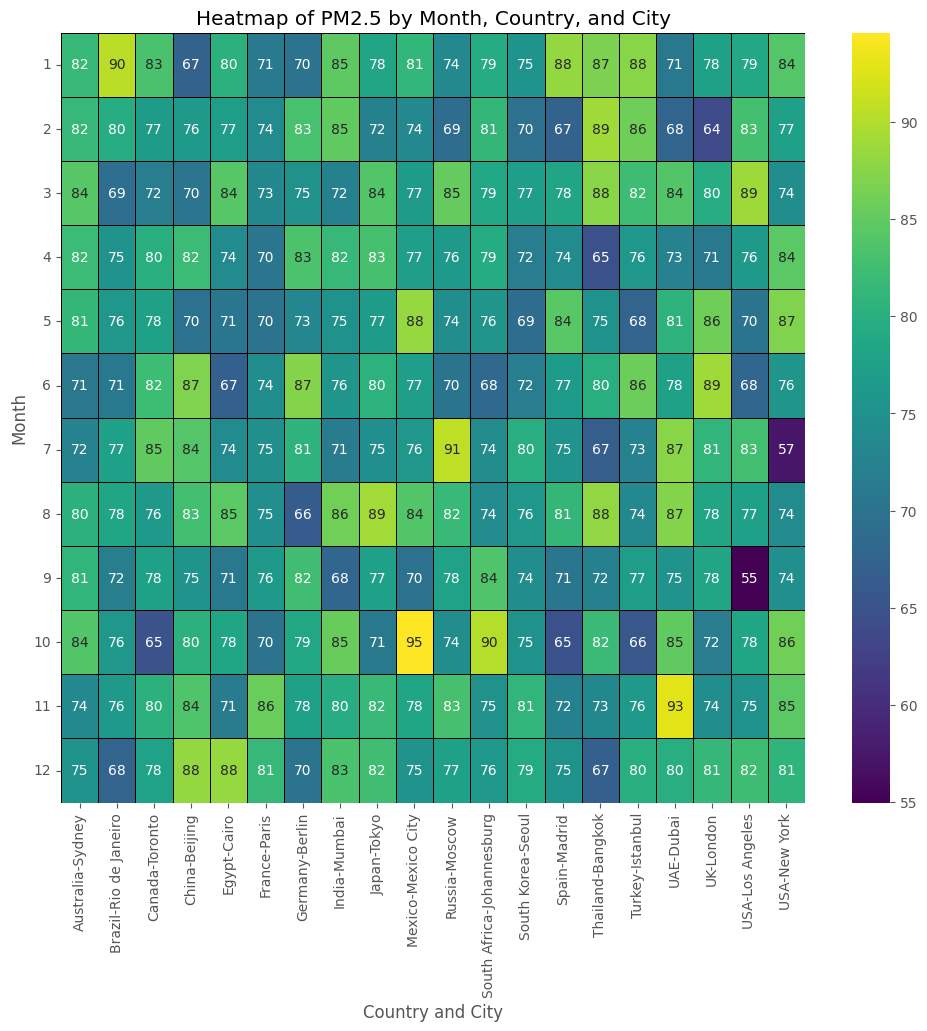

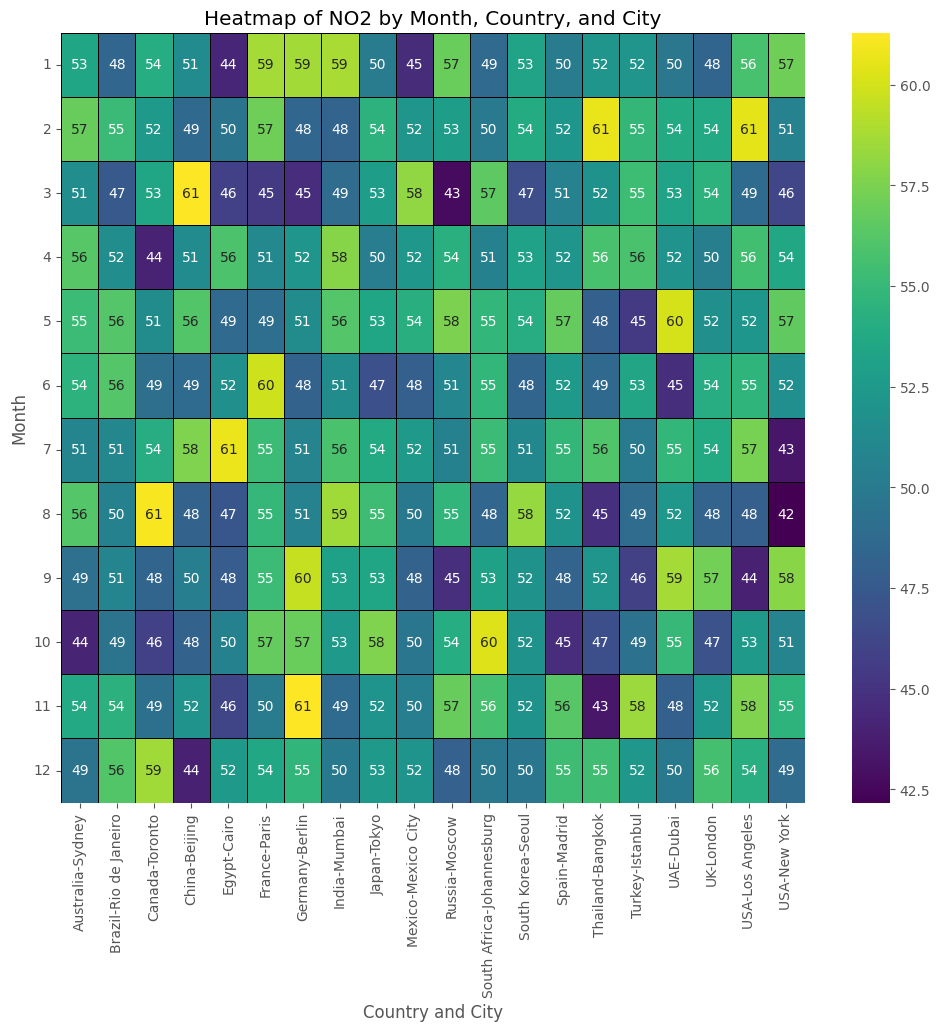

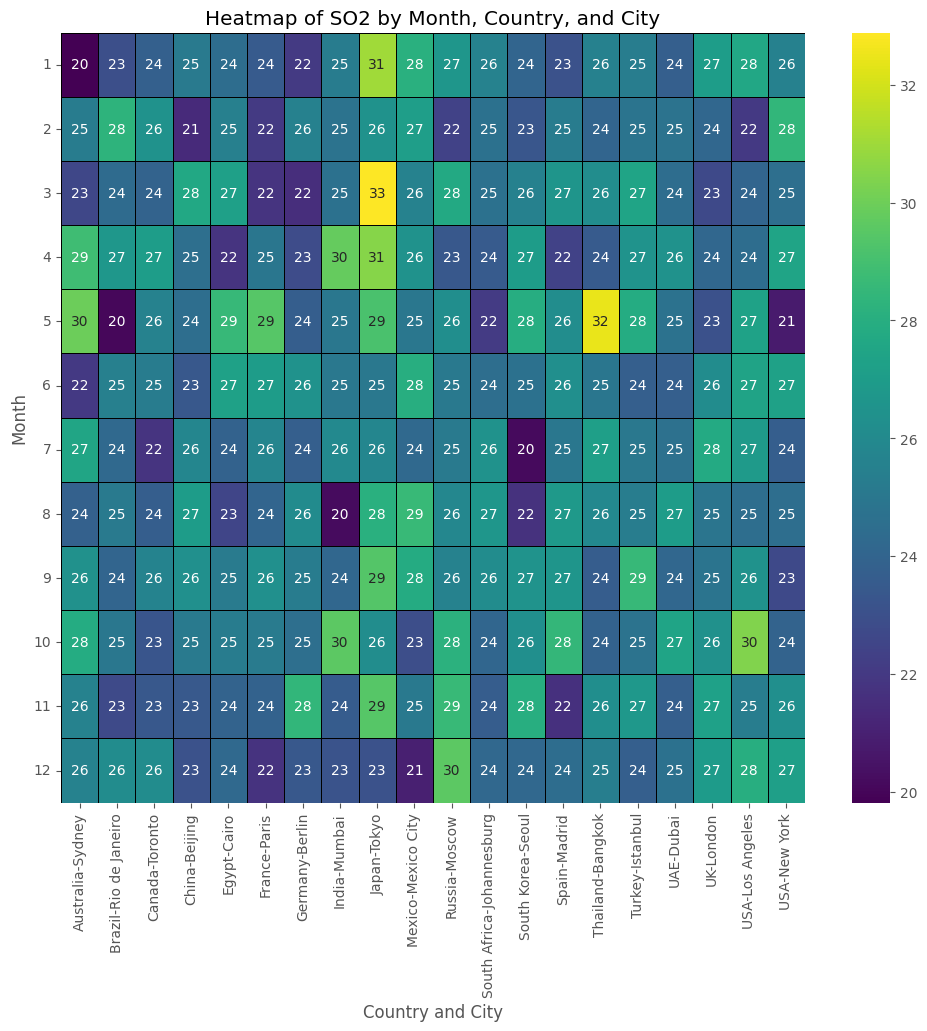

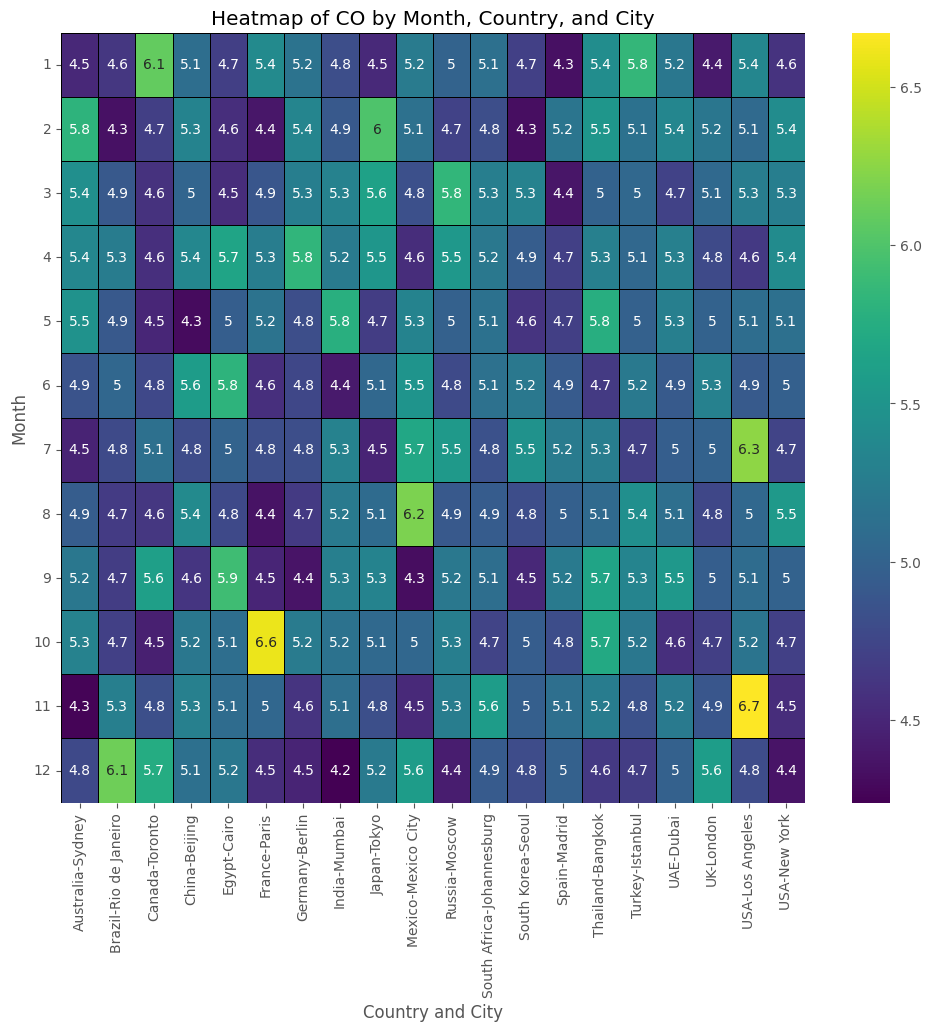

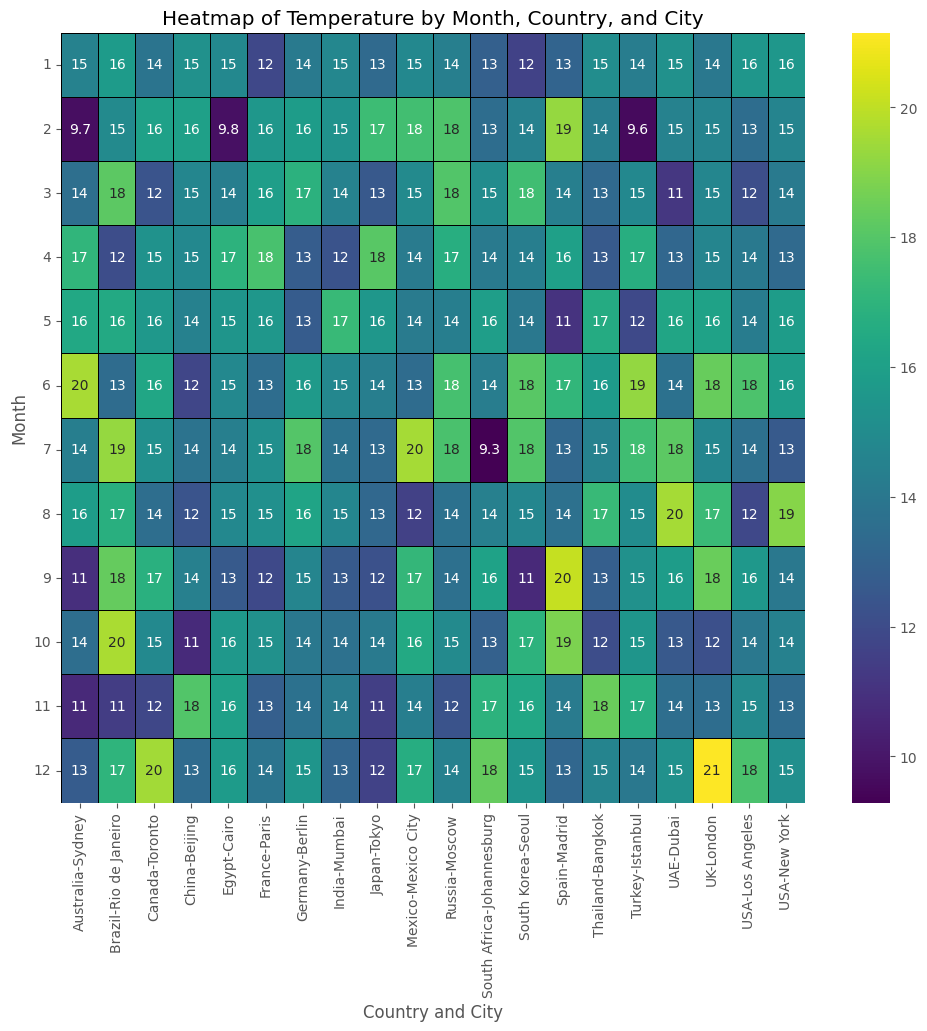

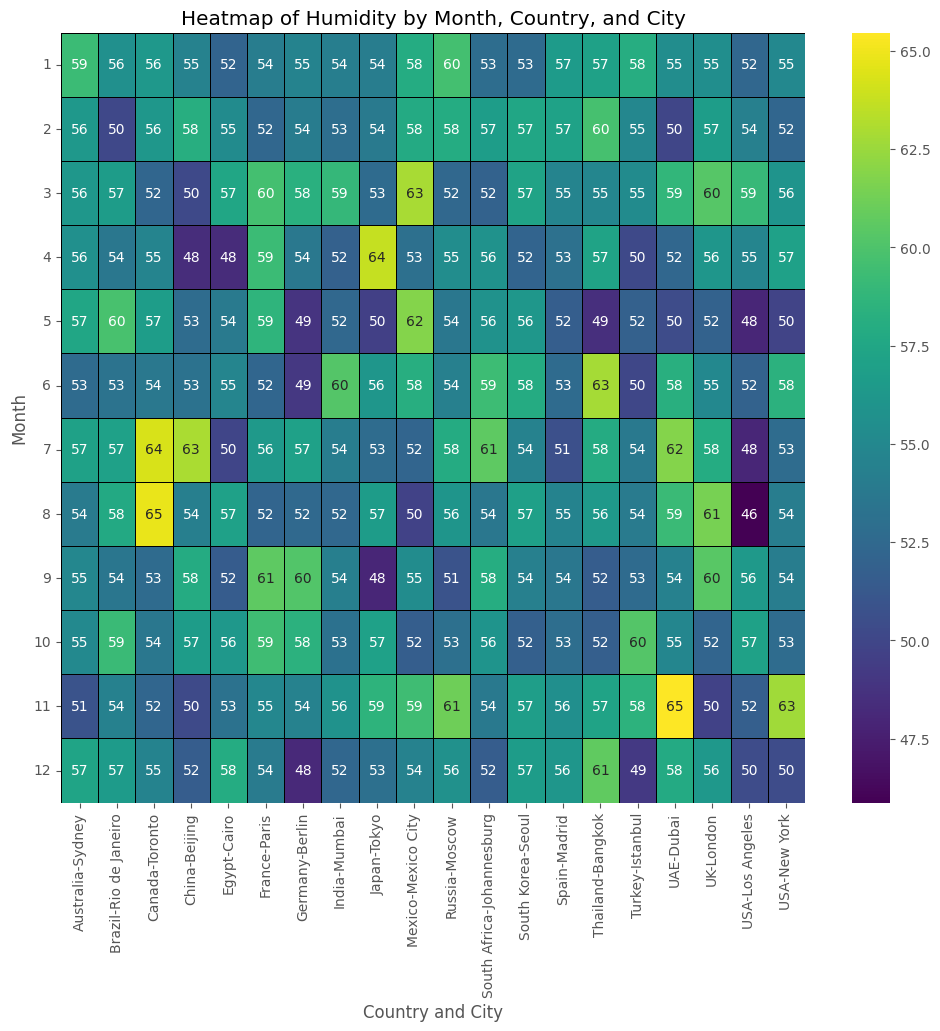

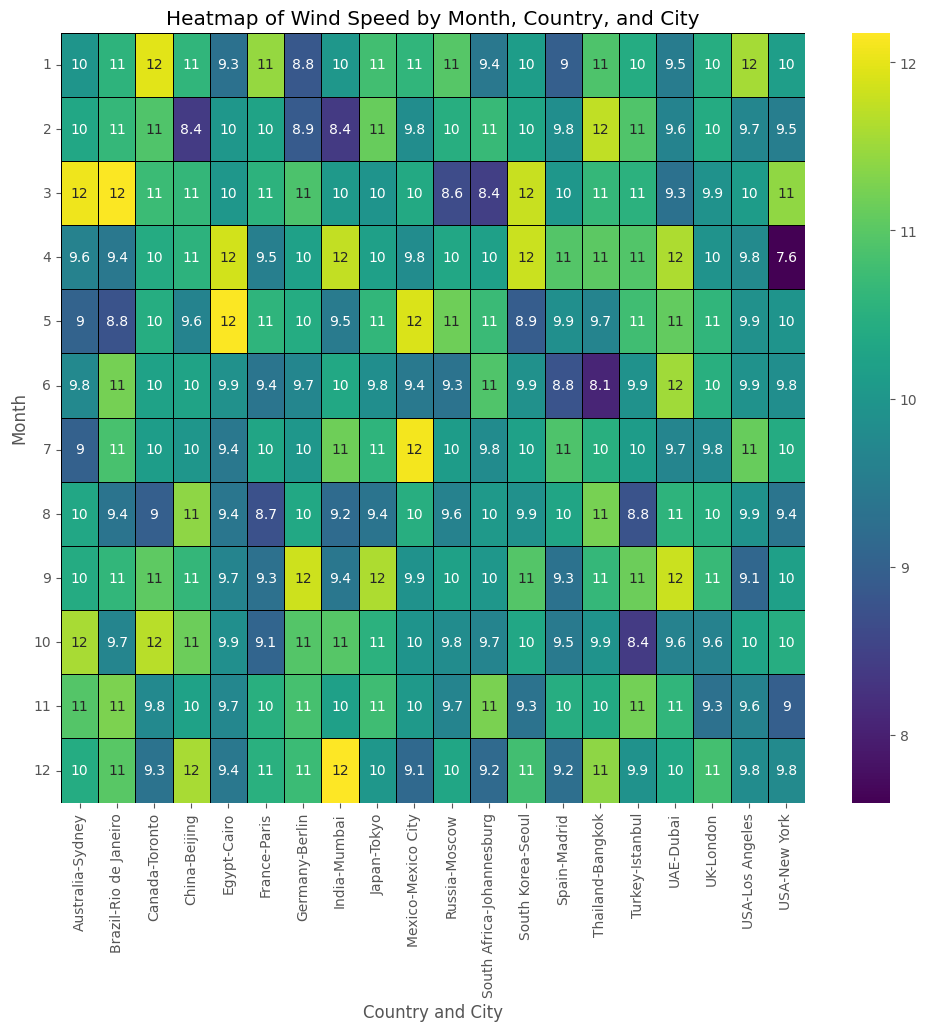

In [31]:
# List of columns to analyze
columns_to_analyze = ['PM2.5', 'NO2', 'SO2', 'CO', 'Temperature', 'Humidity', 'Wind Speed']

 
for column in columns_to_analyze:
    plt.figure(figsize=(12, 10))
    
    # Create pivot table with 'Month' as index and 'Country' + 'City' as columns
    heatmap_data = monthly_country_city_summary.pivot_table(
        index='Month', 
        columns=['Country', 'City'], 
        values=column, 
        aggfunc='mean'
    )
    
    # Plot the heatmap
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap='viridis',  # Choose a color map that fits your preference
        linewidths=0.5,
        linecolor='black'
    )
    
    plt.title(f'Heatmap of {column} by Month, Country, and City')
    plt.xlabel('Country and City')
    plt.ylabel('Month')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
    plt.show()


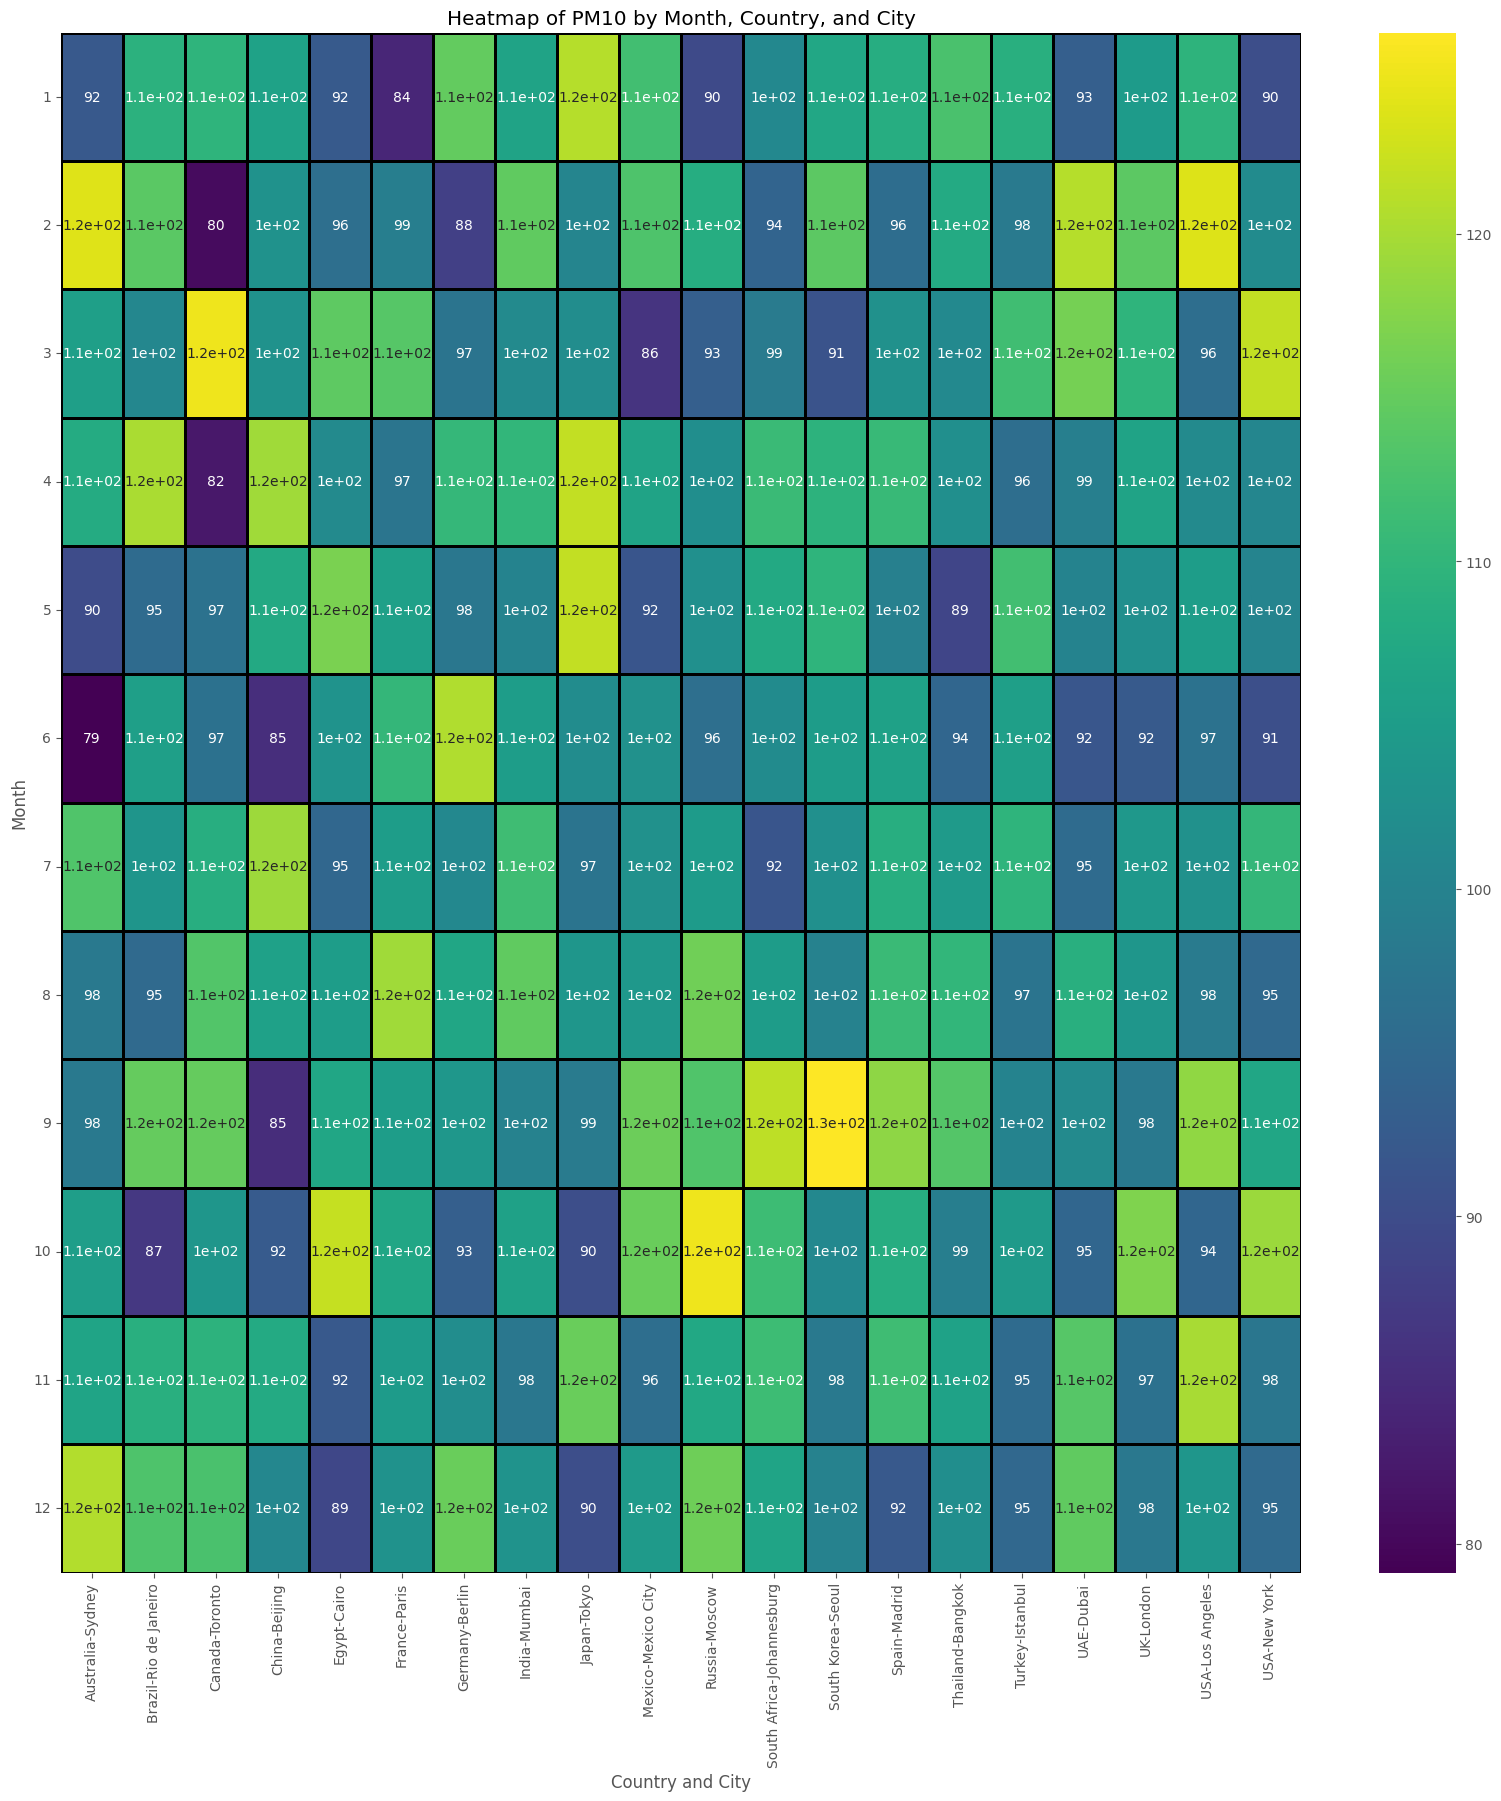

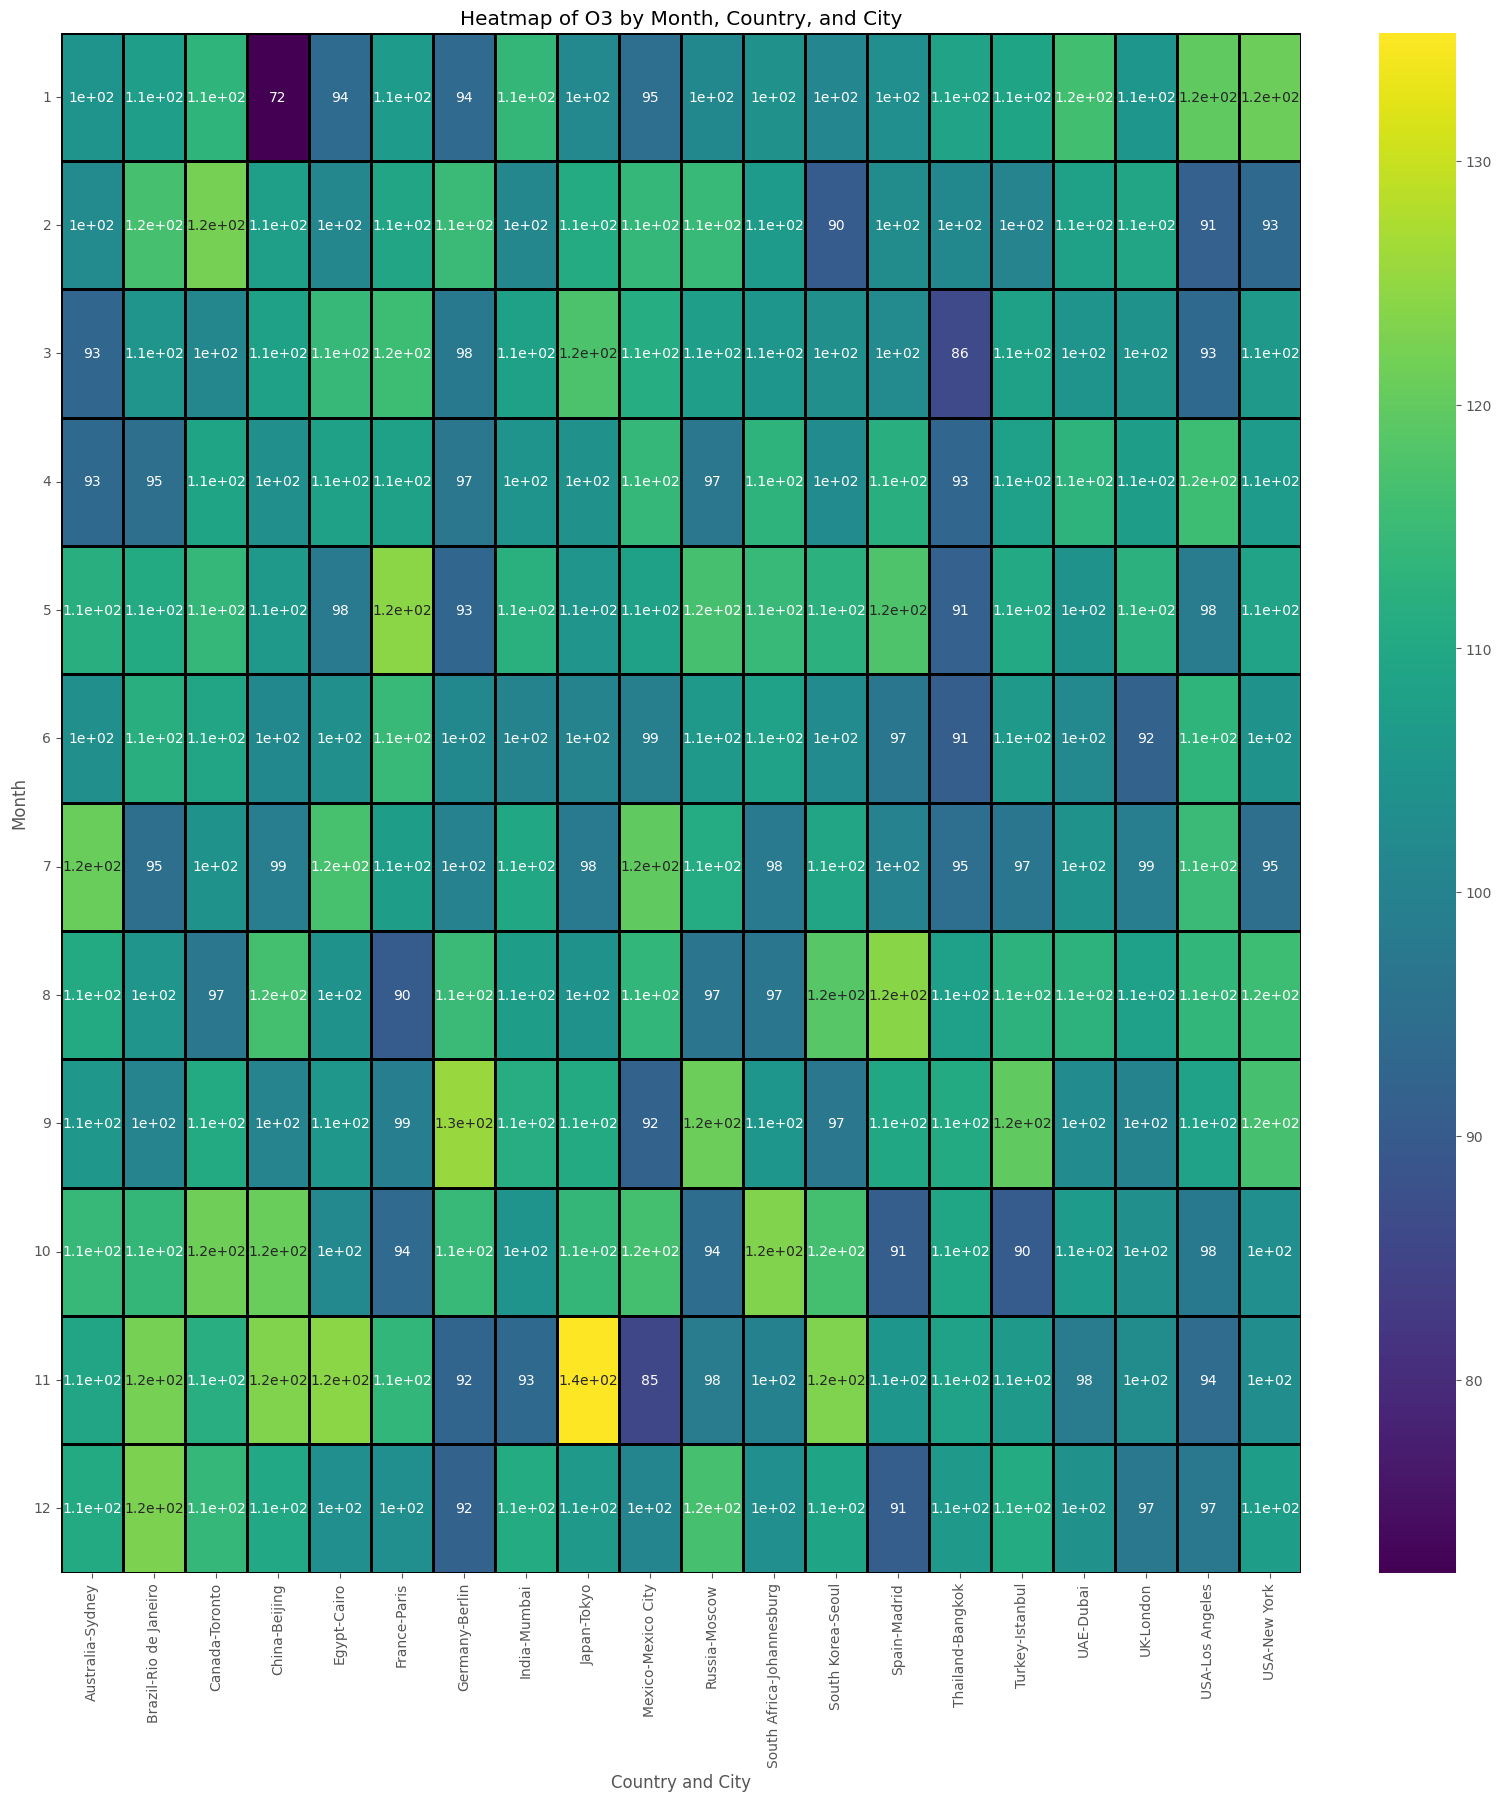

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to analyze
columns_to_analyze = ['PM10', 'O3']

for column in columns_to_analyze:
    plt.figure(figsize=(20, 20))
    
    # Create pivot table with 'Month' as index and 'Country' + 'City' as columns
    heatmap_data = monthly_country_city_summary.pivot_table(
        index='Month', 
        columns=['Country', 'City'], 
        values=column, 
        aggfunc='mean'
    )
    
    # Plot the heatmap
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap='viridis',  # You can choose a different colormap if preferred
        linewidths=1,
        linecolor='black'
    )
    
    plt.title(f'Heatmap of {column} by Month, Country, and City')
    plt.xlabel('Country and City')
    plt.ylabel('Month')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
    plt.show()


In [33]:
monthly_country_city_summary

Year  Month    Country      City      PM2.5        PM10        NO2  \
0    2023      1  Australia    Sydney  81.729750   92.105250  53.462500   
20   2023      2  Australia    Sydney  81.569667  123.900000  56.817000   
40   2023      3  Australia    Sydney  84.095000  105.444706  51.450588   
60   2023      4  Australia    Sydney  81.995882  107.851176  56.249020   
80   2023      5  Australia    Sydney  81.198444   89.799556  55.196222   
..    ...    ...        ...       ...        ...         ...        ...   
159  2023      8        USA  New York  73.899474   94.959474  42.170263   
179  2023      9        USA  New York  74.478125  106.967083  57.933333   
199  2023     10        USA  New York  86.024706  119.022353  50.813824   
219  2023     11        USA  New York  84.647857   97.642381  54.504762   
239  2023     12        USA  New York  80.758056   95.125556  48.874444   

           SO2        CO          O3  ...  Wind Speed  PM2.5_Change  \
0    19.818750  4.510000  104.905750  ...    9.977000           NaN   
20   25.241333  5.807667  101.970667  ...   10.327000     -0.160083   
40   22.594412  5.444118   92.752353  ...   12.057941      2.525333   
60   28.804314  5.361569   93.346275  ...    9.601961     -2.099118   
80   29.964000  5.474000  112.005778  ...    9.041778     -0.797438   
..         ...       ...         ...  ...         ...           ...   
159  24.503421  5.543421  115.307368  ...    9.373421     16.684089   
179  22.704583  4.991458  116.660625  ...   10.177917      0.578651   
199  23.926176  4.698529  103.249706  ...   10.448529     11.546581   
219  26.255952  4.549524  103.140952  ...    8.962619     -1.376849   
239  27.150556  4.370278  107.075000  ...    9.765833     -3.889802   

     PM10_Change  NO2_Change  SO2_Change  CO_Change  O3_Change  \
0            NaN         NaN         NaN        NaN        NaN   
20     31.794750    3.354500    5.422583   1.297667  -2.935083   
40    -18.455294   -5.366412   -2.646922  -0.363549  -9.218314   
60      2.406471    4.798431    6.209902  -0.082549   0.593922   
80    -18.051621   -1.052797    1.159686   0.112431  18.659503   
..           ...         ...         ...        ...        ...   
159   -15.298731   -1.112045    0.823677   0.816498  20.328907   
179    12.007610   15.763070   -1.798838  -0.551963   1.353257   
199    12.055270   -7.119510    1.221593  -0.292929 -13.410919   
219   -21.379972    3.690938    2.329776  -0.149006  -0.108754   
239    -2.516825   -5.630317    0.894603  -0.179246   3.934048   

     Temperature_Change  Humidity_Change  Wind Speed_Change  
0                   NaN              NaN                NaN  
20            -4.791000        -2.878417           0.350000  
40             3.830588        -0.129627           1.730941  
60             3.501471        -0.610098          -2.455980  
80            -0.663281         1.811948          -0.560183  
..                  ...              ...                ...  
159            6.428617         1.426660          -1.020938  
179           -4.978344         0.014430           0.804496  
199            0.395527        -1.374167           0.270613  
219           -1.063711         9.942381          -1.485910  
239            1.768810       -12.380159           0.803214  

[240 rows x 22 columns]

<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Key Findings and Conclusion
    </h2>
</div>


In [34]:
from IPython.display import display, HTML

def Max_Record(feature, df):
    max_value = df[feature].max()
    record = df[df[feature] == max_value][['Country', 'City', 'Date', feature]]
    record_html = record.to_html(index=False)
    result_html = f"""
    <div style="background-color:#E8F5E9; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border:2px solid #A5D6A7; margin-top: 18px;">
        <h3 style="font-size:20px; font-family:Georgia, serif; color:#4CAF50; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">
            Highest Recorded Value of {feature}
        </h3>
        {record_html}
    </div>
    """
    return result_html

def Min_Record(feature, df):
    min_value = df[feature].min()
    record = df[df[feature] == min_value][['Country', 'City', 'Date', feature]]
    record_html = record.to_html(index=False)
    result_html = f"""
    <div style="background-color:#FFEBEE; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border:2px solid #FFCDD2; margin-top: 18px;">
        <h3 style="font-size:20px; font-family:Georgia, serif; color:#E53935; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">
            Lowest Recorded Value of {feature}
        </h3>
        {record_html}
    </div>
    """
    return result_html

def Average_Max_Record(feature, df):
    max_value = df[feature].max()
    record = df[df[feature] == max_value][['Country', 'City', 'Month', feature]]
    record_html = record.to_html(index=False)
    result_html = f"""
    <div style="background-color:#E8F5E9; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border:2px solid #A5D6A7; margin-top: 18px;">
        <h3 style="font-size:20px; font-family:Georgia, serif; color:#4CAF50; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">
            Highest Average Recorded Value of {feature}
        </h3>
        {record_html}
    </div>
    """
    return result_html

def Average_Min_Record(feature, df):
    min_value = df[feature].min()
    record = df[df[feature] == min_value][['Country', 'City', 'Month', feature]]
    record_html = record.to_html(index=False)
    result_html = f"""
    <div style="background-color:#FFEBEE; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border:2px solid #FFCDD2; margin-top: 18px;">
        <h3 style="font-size:20px; font-family:Georgia, serif; color:#E53935; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">
            Lowest Average Recorded Value of {feature}
        </h3>
        {record_html}
    </div>
    """
    return result_html

column_to_analyze = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
all_results = ""

for column in column_to_analyze:
    all_results += Max_Record(column, df)
    all_results += Min_Record(column, df)
    all_results += Average_Max_Record(column, monthly_country_city_summary)
    all_results += Average_Min_Record(column, monthly_country_city_summary)

display(HTML(all_results))


<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Key Findings and Conclusion
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>Seasonal Trends:</b><br>
        Pollutant concentrations exhibit seasonal variations, highlighting the need for targeted interventions during peak periods.
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>City Comparisons:</b><br>
        Cities like Mexico City and Seoul experience significantly high pollutant levels, suggesting potential sources of pollution and the necessity for stringent air quality measures.
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>Low Concentration Cities:</b><br>
        Los Angeles and Sydney show relatively lower pollutant levels, which can serve as benchmarks for other cities aiming to improve air quality.
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>Recommendations:</b><br>
        Implementing air quality monitoring systems and pollution control measures tailored to specific city trends could enhance overall public health.
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>Additional Insights:</b><br>
        - The highest average wind speed is recorded in Mumbai, India, while the lowest is in New York, USA.<br>
        - Dubai, UAE, has the highest average humidity, whereas Los Angeles, USA, shows the lowest.<br>
        - The highest average temperature is observed in London, UK, and the lowest in Johannesburg, South Africa.<br>
        - Beijing, China, has the lowest average O3 concentration, whereas Tokyo, Japan, has the highest.<br>
        - Berlin, Germany, records the highest average NO2 concentration, while New York, USA, has the lowest.
    </p>
</div>


<div style="background-color:#F0F4C3; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border:2px solid #DCE775; margin-top: 18px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#8BC34A; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
        Conclusion and Next Steps
    </h2>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        This notebook has provided a comprehensive analysis of air quality data, focusing on various pollutants and meteorological factors. We have explored month-over-month changes, visualized distributions, and examined correlations to understand how different factors affect air quality across various cities and countries. 
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        The insights gained can be instrumental in identifying trends and making informed decisions regarding air quality management. However, there is always room for improvement and additional analysis. I encourage you to review the findings and share your thoughts or suggestions for enhancing this notebook.
    </p>
    <p style="font-size:18px; font-family:Georgia, serif; line-height: 1.5em; text-align: center; color:#333333;">
        <b>Thank you for your time and support!</b> Your feedback is invaluable, and I welcome any comments or suggestions for further improvement. 
    </p>
     
</div>
